In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

In [ ]:
h = Decimal('6.626e-34')     # constante de Planck (J.s)
c = Decimal('3.0e8')         # velocidade da luz (m/s)
k_B = Decimal('1.381e-23')   # constante de Boltzmann (J/K)
pi = Decimal(str(np.pi))
b_wien = Decimal('2.897771955e-3')  # em m·K

In [ ]:
def planck_law(wavelength: Decimal, T: Decimal) -> Decimal:
    """
    Calcula a Lei de Planck para um comprimento de onda (em metros) e temperatura T (em K).
    """
    wl5: Decimal = wavelength**5
    exponent: Decimal = (h * c) / (wavelength * k_B * T)
    denominator: Decimal = wl5 * (Decimal.exp(exponent) - Decimal(1))
    numerator: Decimal = Decimal(8) * pi * h * c
    return numerator / denominator

In [ ]:
#wavelengths_nm = np.linspace(100, 3000, 1000)
#wavelengths_m = wavelengths_nm * 1e-9
#temperatures = [3000, 4000, 5000, 6000]

wavelengths_nm = [Decimal(str(x)) for x in range(100, 3001, 3)]
wavelengths_m = [wl * Decimal('1e-9') for wl in wavelengths_nm]
temperatures = [Decimal('3000'), Decimal('4000'), Decimal('5000'), Decimal('6000')]

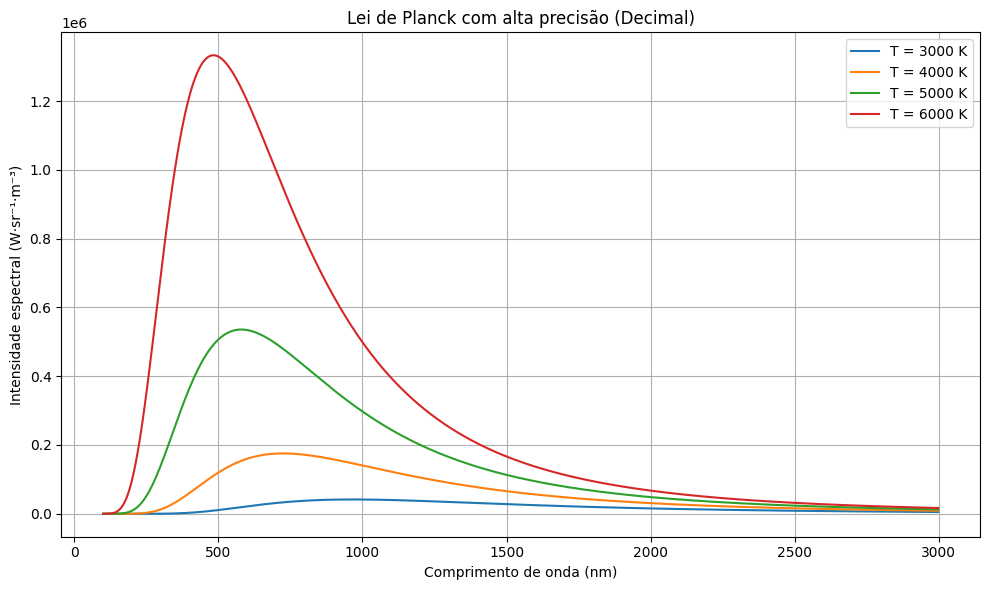

In [ ]:
plt.figure(figsize=(10, 6))
for T in temperatures:
    intensity = [float(planck_law(wl, T)) for wl in wavelengths_m]
    wavelengths_float = [float(wl * Decimal('1e9')) for wl in wavelengths_m]  # converter de volta para nm
    plt.plot(wavelengths_float, intensity, label=f"T = {T} K")

plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade espectral (W·sr⁻¹·m⁻³)")
plt.title("Lei de Planck com alta precisão (Decimal)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
h = float(h)
c = float(c)
k_B = float(k_B)
pi = float(pi)
b_wien = float(b_wien)

In [ ]:
def planck_law_bb(wavelength_m, T) -> float:
    """Spectral radiance (W·sr⁻¹·m⁻³) for a black-body at temperature T (K)."""
    numerator: float = 2*h*c**2 / wavelength_m**5
    exponent: float = h*c / (wavelength_m*k_B*T)
    max_exp: int = 700
    exponent: float = np.clip(exponent, a_min=None, a_max=max_exp)
    denominator: float = np.expm1(exponent) # np.exp(exponent) - 1.0 de forma segura
    return numerator / denominator

In [ ]:
wavelength_um_bb = np.logspace(-1, 3, 1000)          # μm
wavelength_m_bb  = wavelength_um_bb * 1e-6              # m
temperatures_bb = [
    ("6000 K Sol",                 6000),
    ("3000 K Filamento de tungstênio", 3000),
    ("800 K Objeto incandescente avermelhado", 800),
    ("300 K Terra",                300),
    ("195 K Gelo seco",            195),
    ("79 K Ar líquido",            79),
]


In [ ]:
scale_factor = 4e4

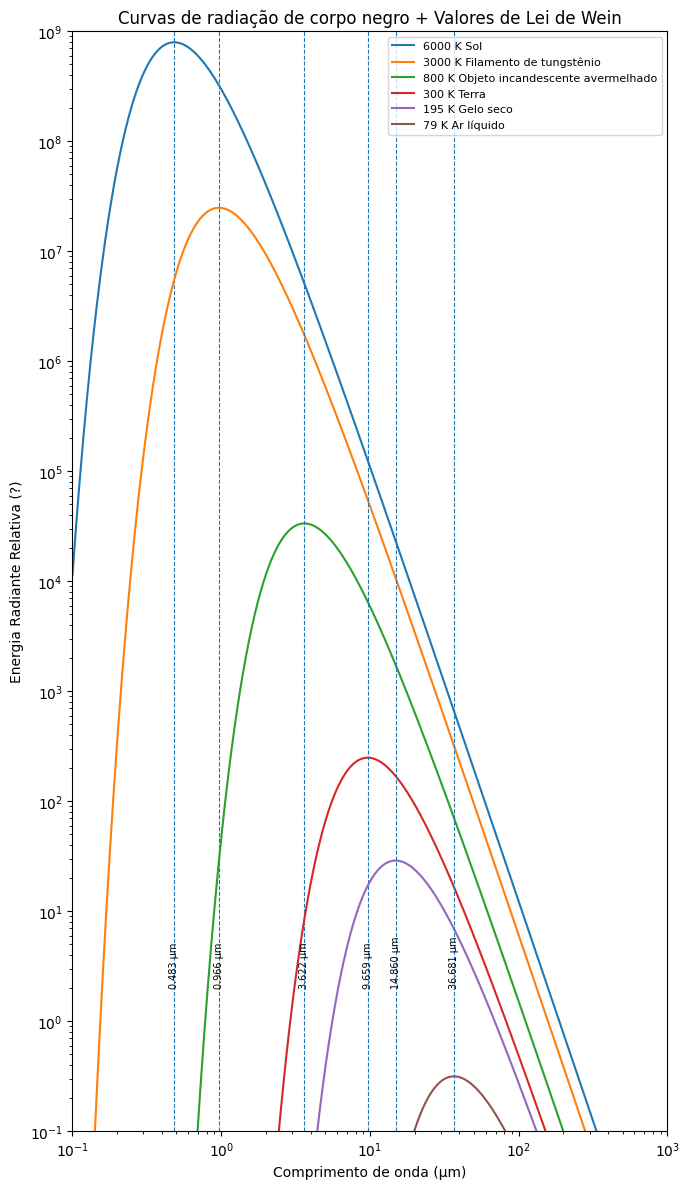

In [ ]:
plt.figure(figsize=(7, 12))

for label, T in temperatures_bb:
    I = planck_law_bb(wavelength_m_bb, T) / scale_factor
    plt.plot(wavelength_um_bb, I, label=label)

    lambda_max_um = b_wien / T * 1e6  # m → μm
    plt.axvline(lambda_max_um, linestyle="--", linewidth=0.8)
    plt.text(lambda_max_um, 2, f"{lambda_max_um:.3f} μm",
             rotation=90, va="bottom", ha="center", fontsize=7)

plt.xscale("log")
plt.yscale("log")
plt.xlim(0.1, 1000)
plt.ylim(1e-1, 1e9)

plt.xlabel("Comprimento de onda (μm)")
plt.ylabel("Energia Radiante Relativa (?)")
plt.title("Curvas de radiação de corpo negro + Valores de Lei de Wein")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()